<a href="https://colab.research.google.com/github/Touhou09/modelImplementTrial/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

퍼셉트론 : 다수의 신호를 입력받아 하나의 신호를 출력
퍼셉트론 신호는 1과 0 2가지의 상태를 가진다.

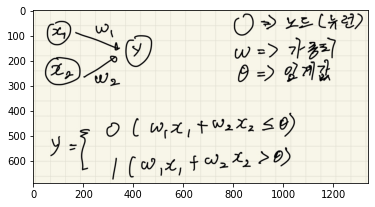

In [46]:
# 이미지(퍼셉트론 회로그림)
plt.imshow(imread('/content/perceptron/퍼셉트론-1.jpg'))

노드에서 보내진 신호가 정해진 한계를 넘어가야 1을 출력하는데
정해진 한계를 임계값이라 부르고 θ라 부른다.

퍼셉트론은 복수의 입력신호 각각에 고유한 가중치를 부여하고 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용한다.
즉, 가중치가 클수록 해당 신호가 그만큼 더 중요하다.

# 단순한 논리회로

1. AND 게이트

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


ar = pd.DataFrame([['x1','x2','y'],[0,0,0],[1,0,0],[0,1,0],[1,1,1]])
print(ar)

    0   1  2
0  x1  x2  y
1   0   0  0
2   1   0  0
3   0   1  0
4   1   1  1


x1과 x2가 모두 1인 경우에만 1을 출력하는 회로를 AND게이트라 하고 이를 퍼셉트론으로 표현하려면 w1, w2, θ의 값을 정하면 된다.

2. NAND와 OR 게이트
NAND게이트는 Not AND게이트를 의미하고 AND게이트를 뒤집은 것과 같다.
진리표는 아래와 같다.

In [ ]:
ar = pd.DataFrame([['x1','x2','y'],[0,0,1],[1,0,1],[0,1,1],[1,1,0]])
print(ar)

    0   1  2
0  x1  x2  y
1   0   0  1
2   1   0  1
3   0   1  1
4   1   1  0


OR게이트는 입력 신호중 하나 이상이 1이면 출력이 1이 되는 회로이고 진리표는 아래와 같다

In [ ]:
ar = pd.DataFrame([['x1','x2','y'],[0,0,0],[1,0,1],[0,1,1],[1,1,1]])
print(ar)

    0   1  2
0  x1  x2  y
1   0   0  0
2   1   0  1
3   0   1  1
4   1   1  1


# 퍼셉트론 구현하기

1. 간단한 구현하기

x1과 x2를 인수로 받는 AND 게이트를 구현하는 AND함수의 구현은 아래와 같다.

In [13]:
def AND(x1,x2):
  w1,w2,theta = 1.0,1.0,1.0

  tmp = w1*x1 + w2*x2

  if tmp > theta:
    return 1
  else:
    return 0

print(AND(0,0),
AND(0,1),
AND(1,0),
AND(1,1))

0 0 0 1


2. 편향과 가중치 도입

θ = -b 에서 아래 식처럼 표현이 가능하고
식에서 b는 편향, w1,w2는 가중치로 표현 가능하다.

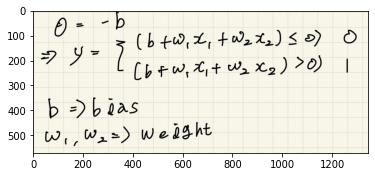

In [47]:
# 이미지(편향-가중치 수식)
import matplotlib.pyplot as plt
from matplotlib.image import imread

plt.imshow(imread('/content/perceptron/퍼셉트론-2.jpg'))

이를 파이썬 코드로 표현하면 아래와 같다.

In [18]:
import numpy as np
x = np.array([1,1])
w = np.array([1.0,1.0])
b = -1.0

np.sum(w*x)
np.sum(w*x) + b

1.0

x의 값의 변동에 따라 가중치와 편향이 더해져서 계산된다.
이를 함수로 표현하면 아래와 같다.

In [40]:
def AND(x1,x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5])
  b = -0.7

  temp = np.sum(w*x) + b

  if temp <= 0:
    return 0

  else:
    return 1

AND(1,0)

0

w1,w2는 b와 기능이 다르다
w1,w2는 가중치로 각 입력신호가 결과에 주는 영향력을 조절하는 매개변수고, b는 편향으로 뉴련이 얼마나 쉽게 활성화 하느냐를 조정하는 매개변수이다.

예를들면 b = -0.1에서 각 신호에 가중치를 곱한 값들의 합이 0.1을 초과하는 경우에만 뉴런이 활성화된다.
반면 b = -20에서 각 신호에 가중치를 곱한 값들의 합이 20을 초과하지 못하면 뉴런은 활성화되지 않는다.

가중치와 편향은 서로 구별되지만 문맥에 따라 모두 가중치로 통합하는 경우도 있다.

NAND와 OR을 구현하면 아래와 같다

In [37]:
# NAND는 AND의 반대와 같다.
def NAND(x1,x2):
  x = np.array([x1,x2])
  w = np.array([-0.5,-0.5])
  b = 0.7

  temp = np.sum(w*x) + b

  if temp <= 0:
    return 0

  else:
    return 1

NAND(1,0)

1

In [38]:
def OR(x1,x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5])
  b = -0.2

  temp = np.sum(w*x) + b

  if temp <= 0:
    return 0
  else:
    return 1

# 퍼셉트론의 한계


퍼셉트론의 구조로는 XOR게이트를 구현 불가능하다.

XOR게이트의 진리표는 아래와 같다

In [27]:
ar = pd.DataFrame([['x1','x2','y'],[0,0,0],[1,0,1],[0,1,0],[1,1,0]])
print(ar)

    0   1  2
0  x1  x2  y
1   0   0  0
2   1   0  1
3   0   1  0
4   1   1  0


XOR의 경우에는 다른 게이트와 다르게 비선형 구조를 가졌기 때문에 단일 퍼셉트론 구조로는 표현이 불가능하다

이는 비선형 구조의 경우에는 다층 퍼셉트론으로 구현이 가능하다는 의미이다.

기존 게이트를 좋아하면 아래 이미지와 같은 기호로 조합이 가능하다.

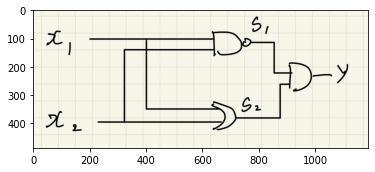

In [44]:
# 이미지(회로도)
plt.imshow(imread('/content/perceptron/퍼셉트론-3.jpg'))

각 NAND, OR 게이트에서 출력하는 값은 s1,s2라고 할때
진리표는 아래와 같다.

In [28]:
ar = pd.DataFrame([['x1','x2','s1','s2','y'],[0,0,1,0,0],[1,0,1,1,1],[0,1,1,1,1],[1,1,0,1,0]])
print(ar)

    0   1   2   3  4
0  x1  x2  s1  s2  y
1   0   0   1   0  0
2   1   0   1   1  1
3   0   1   1   1  1
4   1   1   0   1  0


그리고 이를 파이썬으로 구현하면 아래와 같다.

In [41]:
def XOR(x1,x2):
  s1 = NAND(x1,x2)
  s2 = OR(x1,x2)
  y = AND(s1,s2)

  return y

XOR(1,0)

1

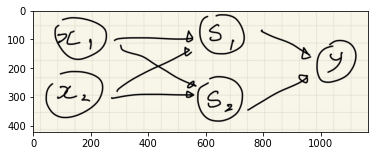

In [45]:
# 이미지 (회로도 2)
plt.imshow(imread('/content/perceptron/퍼셉트론-4.jpg'))

위의 회로도와 같이 XOR게이트는 2층 구조의 퍼셉트론으로 이루어져있다.

위의 회로는 아래와 같은 구조로 동작한다.
1. 0층의 두 뉴런이 입력신호를 받아 1층의 뉴런으로 신호를 보낸다.
2. 1층의 두 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 y를 출력한다.

2층 이상의 구조를 가진 '다층 퍼셉트론'은 '단층 퍼셉트론'으로 구현하지 못하는 회로를 층을 하나 늘려 구현할 수 있었다.



# 결론

이번 장에서는 아래의 내용들을 배웠다.
* 퍼셉트론은 입출력을 가진 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
* 퍼셉트론에서 '가중치'와 '편향'을 매개변수로 설정한다.
* 퍼셉트론으로 AND, OR 게이트 등의 논리회로를 표현할 수 있다.
* XOR게이트는 단층 퍼셉트론으로는 표현할 수 없다.
* 2층 퍼셉트론을 이용하면 XOR게이트를 표현할 수 있다.
* 단층 퍼셉트론은 직선형 영역(선형)만 표현 가능하고, 다층 퍼셉트론은 비선형 영역(비선형)도 표현 가능하다.
* 다층 퍼셉트론은 이론상 컴퓨터를 표현 가능하다.